# Question 1:
### Make a 9x9 numpy array filled with the repeating pattern 1,2,3,1,2,3,...

In [11]:
import numpy as np
x = np.ones((9,9))
for i in range(9):
    for j in range(9):
        x[i][j] += j%3
print(x)

[[1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]]


# Question 2:
### Write a function that performs min-max scaling on a numpy array across rows 

## Example:

### Input 
$\begin{bmatrix}1& 2& 3\\10 & 15 & 20 \\ -5 & -11&  9\end{bmatrix}$
    
### Output
$\begin{bmatrix} 0 & 0.5 & 1 \\ 0 & 0.5 & 1 \\ 0.3 & 0 & 1 \end{bmatrix}$


In [23]:
import numpy as np
def scaling(x):
    x = np.array(x, dtype=np.float64)
    for i in range(x.shape[0]):
        minimum = min(x[i])
        maximum = max(x[i])
        for j in range(x.shape[1]):
            x[i][j] = (x[i][j]-minimum)/(maximum-minimum)
    return x
x = np.array([[1, 2, 3], [10, 15, 20], [-5, -11, 9]])
print(scaling(x))

[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.3 0.  1. ]]


In [13]:
import numpy as np
def scaling_without_for(x):
    x = np.array(x, dtype=np.float64)
    minimum = np.min(x, axis=1)
    maximum = np.max(x, axis=1)
    x = np.subtract(x,np.tile(minimum, (x.shape[1], 1)).T)
    div = np.tile(maximum-minimum, (x.shape[1],1)).T
    return np.divide(x, div)
x = np.array([[1, 2, 3], [10, 15, 20], [-5, -11, 9]])
print(scaling_without_for(x))

[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.3 0.  1. ]]


# Question 3:
### Find index of the element of the array which is closest to a given value

## Example:

### Input 
$\begin{bmatrix}4.5& -5& 83\\5.11 & 5.25 & 20 \\ -5 & 42&  69.99\end{bmatrix}$
    
val = 5

### Output

index = (1, 0)


In [25]:
x = [[4.5, -5, 83], [5.11, 5.25, 20], [-5, 42, 69.99]]
val = 5
import numpy as np
x = np.array(x)
closest = (0,0)
diff = abs(x[0][0]-val)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        if (abs(x[i][j]-val)<diff) :
            diff = abs(x[i][j]-val)
            closest = (i,j)
print(closest)

(1, 0)


In [42]:
x = [[4.5, -5, 83], [5.11, 5.25, 20], [-5, 42, 69.99]]
val = 5
import numpy as np
x = np.array(x)
val_1 = np.full((x.shape[0], x.shape[1]), val)
matrix = abs(np.subtract(x, val_1))
min_dis = min(np.min(matrix, axis=1))
print(np.where(matrix==min_dis))

(array([1]), array([0]))


# Question 4:
### Implement A sliding window average of a given array

Example: https://www.youtube.com/watch?v=ZoaEDbivmOE

In [22]:
def sliding_average(x): # assuming that a numpy array has been passed
    y = np.ones((x.shape[0]-2, x.shape[1]-2))
    for i in range(1, x.shape[0]-1):
        for j in range(1, x.shape[1]-1):
            L = x[i-1:i+2, j-1:j+2]
            y[i-1][j-1] = np.sum(L)/9.0
    return y
x = np.random.randint(10, size=(10,10))
print(x)
print(sliding_average(x))

[[7 0 3 1 3 1 5 5 8 1]
 [3 7 7 7 1 1 5 8 5 2]
 [6 5 1 7 4 4 7 0 0 5]
 [0 1 5 9 3 6 3 9 8 3]
 [4 7 3 8 2 5 3 7 1 8]
 [4 3 0 1 9 4 1 5 0 8]
 [3 2 1 2 2 4 3 5 8 5]
 [1 1 3 6 7 1 5 6 5 4]
 [3 6 0 4 5 3 4 3 0 2]
 [1 4 2 9 2 8 9 9 3 0]]
[[4.33333333 4.22222222 3.77777778 3.22222222 3.44444444 4.
  4.77777778 3.77777778]
 [3.88888889 5.44444444 4.88888889 4.66666667 3.77777778 4.77777778
  5.         4.44444444]
 [3.55555556 5.11111111 4.66666667 5.33333333 4.11111111 4.88888889
  4.22222222 4.55555556]
 [3.         4.11111111 4.44444444 5.22222222 4.         4.77777778
  4.11111111 5.44444444]
 [3.         3.         3.11111111 4.11111111 3.66666667 4.11111111
  3.66666667 5.22222222]
 [2.         2.11111111 3.44444444 4.         4.         3.77777778
  4.22222222 5.11111111]
 [2.22222222 2.77777778 3.33333333 3.77777778 3.77777778 3.77777778
  4.33333333 4.22222222]
 [2.33333333 3.88888889 4.22222222 5.         4.88888889 5.33333333
  4.88888889 3.55555556]]


# (Optional) Question 5
### Implement John Conway's Game of Life

You can read about the rules of the game and play it at: https://bitstorm.org/gameoflife/

In [32]:
import numpy as np
A = np.random.randint(2, size=(22,22)) # padding of 1 on all 4 sides
print("The original matrix is : \n")
print(A[1:21, 1:21])
while (True):
#     x, y = input().split()
#     x, y = int(x), int(y)
#     A[x][y] = not A[x][y]
    B = A
    for i in range(1, 21):
        for j in range(1, 21):
            count = np.sum(A[i-1:i+2, j-1:j+2]) # I assume that by neighnours we mean populated spaces
            if A[i][j]:
                if count < 2 or count >3 :
                    A[i][j] = 0
            elif count ==3 :
                A[i][j] = 1
    if np.sum(B==A)== 22*22:
        break
print("The final matrix that does not change on further operations is : \n")
print(A[1:21, 1:21])

The original matrix is : 

[[1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1]
 [1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1]
 [0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0]
 [1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1]
 [1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0]
 [0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0]
 [0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0]
 [1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1]
 [1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1]
 [0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1]
 [0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1]
 [1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1]
 [1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1]
 [1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1]
 [0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 1]
 [1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0]
 [0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0]
 [1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1]
 [0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0]
 [1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1]]
The final matrix that does not change on further operations is : 

[[0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0]
 [

# Final Task 
## Implement edge detection using a Sobel Filter
Read more about Sobel filter : [Wikipedia article](https://en.wikipedia.org/wiki/Sobel_operator "Sobel Operator")
Some sample code to display the results is already given



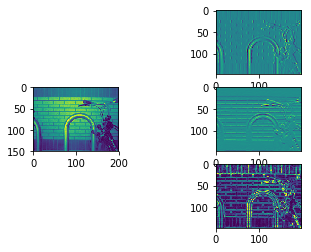

In [21]:
%matplotlib inline
# Note: DO NOT USE THE SCIPY INBUILT FUNCTION. CONVOLVE USING FILTERS AND NORMALIZE
import scipy
import imageio
import matplotlib.pyplot as plt
import numpy as np

im = imageio.imread('./fig01.jpg').astype("int32")
grey_img = im #convert image to greyscale 

grey_shape = list(im.shape)
grey_shape[-1] = 1
grey_shape = tuple(grey_shape)
# print(grey_shape)
ax1 = plt.subplot(323)
ax2 = plt.subplot(322)
ax3 = plt.subplot(324)
ax4 = plt.subplot(326)

## Initializing the sobel filter
filterx = np.array([[3, 0 ,-3],
                      [10 , 0 , -10],
                      [3, 0 ,-3]])
filtery = filterx.T

## Fill the code below

dx = np.zeros((grey_img.shape[0]-2, grey_img.shape[1]-2))# Derivative of image in X direction
dy = np.zeros((grey_img.shape[0]-2, grey_img.shape[1]-2))# Derivative of image in Y direction
for i in range(grey_img.shape[0]-2):
    for j in range(grey_img.shape[1]-2):
        dx[i][j] = np.sum(filterx*grey_img[i:i+3, j:j+3])
        dy[i][j] = np.sum(filtery*grey_img[i:i+3, j:j+3])
mag =  np.sqrt(np.multiply(dx,dx)+ np.multiply(dy,dy))# Net magnitude of derivative
normalized = scaling_without_for(mag) # Normalize using max value

## End
## Plot it
ax1.imshow(im)
ax2.imshow(dx)
ax3.imshow(dy)
ax4.imshow(normalized)
plt.show()

# All Done?
## Checkout these advanced guides

### [Advanced Numpy](https://scipy-lectures.org/advanced/advanced_numpy/index.html)
### [Image Processing](https://scipy-lectures.org/advanced/image_processing/index.html)